Visualization of text is an inportant discovery/explortion, that should be carried out to understand the structure/theme in the text. This helps us to expect the model to perform in tune with our understanding.

There are three approaches to feature exploration with texts. They are - tabular, graphical and wordcloud. Each approach has some merits and limitations. In this excercise we will explore the text from our earlier work on 'python.org' and a speech from present of USA (https://www.rev.com/blog/donald-trump-speech-transcript-turning-point-usa-teen-student-summit-speech).

In [1]:
import nltk

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
text = "all your base are belong to us"

In [5]:
wordcloud = WordCloud().generate(text)

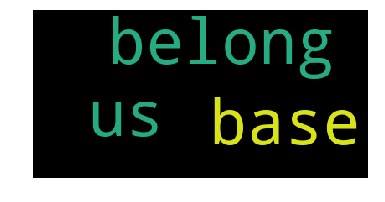

In [6]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

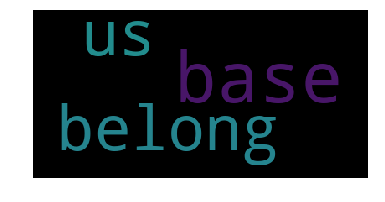

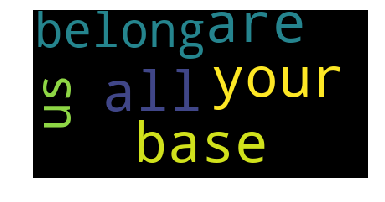

In [10]:
wordcloud = WordCloud().generate(text)
plot_wordcloud(wordcloud)
wordcloud = WordCloud(stopwords={'to', 'of'}).generate(text)
plot_wordcloud(wordcloud)


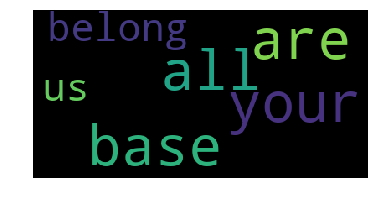

In [8]:
wordcloud = WordCloud(relative_scaling=1.0,
                      stopwords={'to', 'of'}).generate(text)
plot_wordcloud(wordcloud)

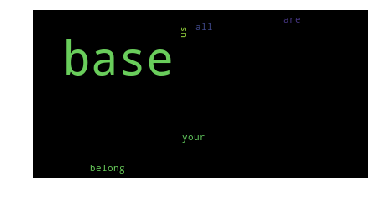

In [9]:
text_base = "all your base are belong to us base base base base"
wordcloud = WordCloud(relative_scaling=1.0,
                      stopwords={'to', 'of'}).generate(text_base)
plot_wordcloud(wordcloud)


In [10]:
washington = nltk.corpus.inaugural.raw('1789-Washington.txt')
obama = nltk.corpus.inaugural.raw('2009-Obama.txt')

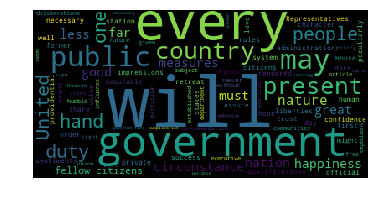

In [11]:
wordcloud = WordCloud(relative_scaling=1.0).generate(washington)
plot_wordcloud(wordcloud)

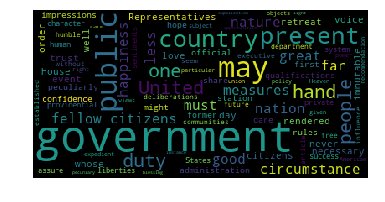

In [12]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("every")
stopwords.add("will")
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(washington)
plot_wordcloud(wordcloud)


In [13]:
#Trump speech
from urllib.request import urlopen
response = urlopen('https://www.rev.com/blog/donald-trump-speech-transcript-turning-point-usa-teen-student-summit-speech')
html = response.read()
print(len(html))
tokens = [tok for tok in html.split()]

238742


In [14]:
#We clean it a bit
from bs4 import BeautifulSoup
print("Calling BS4")
soup = BeautifulSoup(html, 'html.parser')

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract() 

Calling BS4


In [15]:
#Get the token
tokens = [tok for tok in soup.get_text().split()]

In [16]:
print(tokens[0:100])

['Donald', 'Trump', 'Speech', 'Transcript:', 'Turning', 'Point', 'USA', 'Teen', 'Student', 'Summit', 'Speech', '-', 'Rev', 'The', 'Company', 'Careers', 'Press', 'Freelancers', 'Blog', '×ServicesTranscriptionCaptionsForeign', 'SubtitlesTranslationFreelancersAboutContact', 'Login', 'Donald', 'Trump', 'Speech', 'Transcript:', 'Turning', 'Point', 'USA', 'Teen', 'Student', 'Summit', 'Speech', 'Rev', 'Jul', '23,', '2019Political', 'Transcripts', 'Rev', '›', 'Blog', '›', 'Political', 'Transcripts', '›', 'Donald', 'Trump', 'Speech', 'Transcript:', 'Turning', 'Point', 'USA', 'Teen', 'Student', 'Summit', 'Speech', 'Share', 'Donald', 'Trump', 'spoke', 'to', 'a', 'group', 'of', 'teenagers', 'on', 'July', '23,', '2019', 'at', 'a', 'summit', 'for', 'the', 'conservative', 'group', 'Turning', 'Point', 'USA.', 'The', 'speech', 'made', 'headlines', 'for', 'the', 'fake', 'presidential', 'seal', 'that', 'President', 'Trump', 'stood', 'in', 'front', 'of', 'during', 'the', 'speech.', 'See', 'the']


In [17]:
def wordfreq (words):
    """Function to generated the frequency distribution of the
given text"""
    word_freq={}
    for tok in words:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
    return word_freq

In [18]:
new_tokens = wordfreq(tokens)

<FreqDist with 3547 samples and 13972 outcomes>
[('the', 428), ('and', 325), ('to', 314), ('I', 257), ('a', 254), ('of', 224), ('you', 167), ('they', 165), ('that', 162), ('have', 148), ('in', 144), ('Trump:', 141), ('we', 115), ('is', 109), ('our', 109), ('for', 107), ('are', 91), ('They', 88), ('it', 85), ('We', 84), ('was', 80), ('going', 76), ('not', 75), ('be', 73), ('this', 69)]


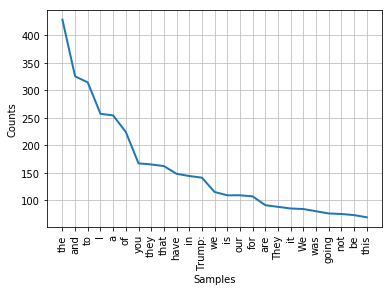

In [19]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

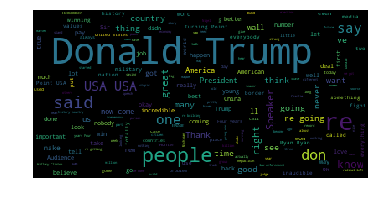

In [20]:
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(soup.get_text())
plot_wordcloud(wordcloud)

Calling BS4
<FreqDist with 519 samples and 981 outcomes>
[('Python', 49), ('>>>', 24), ('and', 19), ('to', 15), ('the', 13), ('is', 11), ('for', 11), ('News', 11), ('Events', 11), ('of', 10), ('Community', 9), ('#', 9), ('More', 9), ('Software', 8), ('=', 8), ('a', 8), ('3', 8), ('in', 8), ('with', 7), ('PSF', 7), ('your', 6), ('Docs', 6), ('The', 6), ('Guide', 6), ('PyCon', 5)]


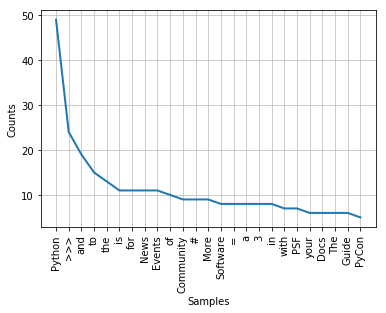

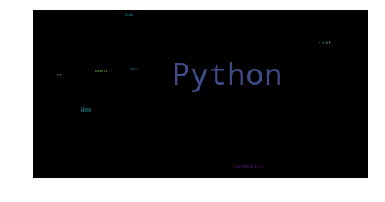

In [21]:
#Python.org
from urllib.request import urlopen
response = urlopen('http://python.org/')
html = response.read()

#We clean it a bit
from bs4 import BeautifulSoup
print("Calling BS4")
soup = BeautifulSoup(html, 'html.parser')

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract() 
    
#Get the token
tokens = [tok for tok in soup.get_text().split()]

#Plot frequency distributions
Freq_dist_nltk=nltk.FreqDist(tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

#Plot the word cloud
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(soup.get_text())
plot_wordcloud(wordcloud)

In conclusion, there is no single visualization techniques which gives complete clarity on the conent. It is advisable use multiple approaches to explore/discover the themes/insights from text.